# Параметр &eta; ( отношение Q70 / QR70_150 ) 
## для модельных ливней 10 и 30 ПэВ 00-20 град

In [1]:
!date
!pwd

Срд Мар 15 21:50:47 MSK 2017
/home/sphere/Model/Code/02-DrawLDF/DrawSum


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
filename = 'all_Q_00-20.csv'
data = pd.read_csv(filename, index_col=0)
print(data.shape)
data.head(3)

(685, 10)


,n,Q35,Q50,Q70,Q,QR35_70,QR70_150,QR50_200,part,energy
0,0,6.638755e+09,9.312693e+09,1.229438e+10,2.678915e+10,5.340296e+09,6.557978e+09,1.174127e+10,p,10
1,1,4.902221e+09,7.433032e+09,1.068834e+10,3.257344e+10,5.417280e+09,8.809426e+09,1.528288e+10,p,10
2,2,4.255926e+09,6.441772e+09,9.331204e+09,3.090447e+10,4.741578e+09,8.355898e+09,1.436892e+10,p,10


In [4]:
qq = []
for en in [10, 30]:
    for par in ['p','h','n','f']:
        tmp = data[(data.part==par) & (data.energy == en)]
        num = (tmp.Q70/tmp.QR70_150).count()
        mea = (tmp.Q70/tmp.QR70_150).mean()
        std = (tmp.Q70/tmp.QR70_150).std()
        #print(en, par, num,  mea, std)
        qq.append([en, par, num,  mea, std])
q  = pd.core.frame.DataFrame(qq, columns=['energy', 'par', 'num', 'Q70/QR70_150', 'std'])
#q.to_csv("Q70_Q150.csv")        

In [5]:
q

,energy,par,num,Q70/QR70_150,std
0,10,p,134,0.917504,0.229061
1,10,h,133,0.837090,0.126832
2,10,n,129,0.727746,0.132170
3,10,f,84,0.662057,0.062605
4,30,p,31,0.892081,0.177301
5,30,h,26,0.919200,0.160529
6,30,n,48,0.837433,0.109114
7,30,f,100,0.740499,0.065489


In [6]:
data['eta70_150'] = data.Q70/data.QR70_150
data.head(3)

,n,Q35,Q50,Q70,Q,QR35_70,QR70_150,QR50_200,part,energy,eta70_150
0,0,6.638755e+09,9.312693e+09,1.229438e+10,2.678915e+10,5.340296e+09,6.557978e+09,1.174127e+10,p,10,1.874721
1,1,4.902221e+09,7.433032e+09,1.068834e+10,3.257344e+10,5.417280e+09,8.809426e+09,1.528288e+10,p,10,1.213285
2,2,4.255926e+09,6.441772e+09,9.331204e+09,3.090447e+10,4.741578e+09,8.355898e+09,1.436892e+10,p,10,1.116721


## количество модельных событий

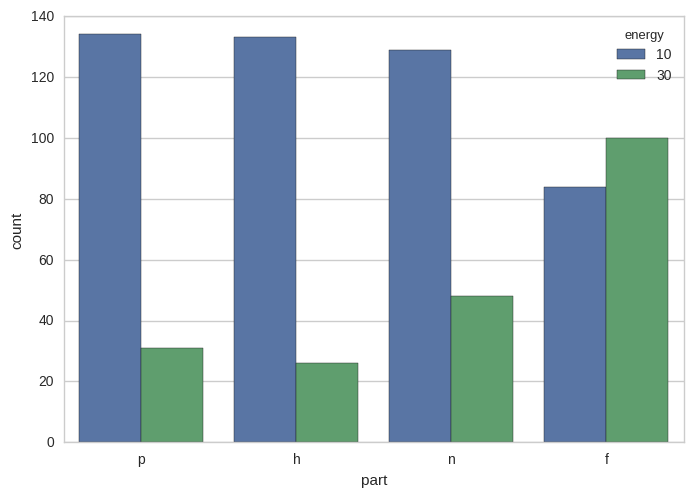

In [8]:
# количество модельных событий
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='part', hue='energy', data=data);

# Построим отношение Q70 / QR70_150
примеры на сайте http://seaborn.pydata.org/tutorial/categorical.html

### boxplot 
This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

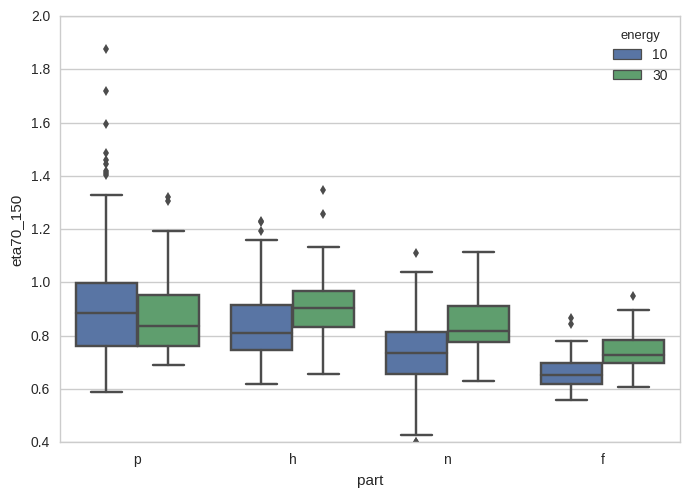

In [9]:
tmp = data[['part', 'energy','eta70_150']]
sns.boxplot(x="part", y="eta70_150", hue="energy", data=tmp);

### Bar plot. 
shows an arbitrary estimate, using the mean by default. When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

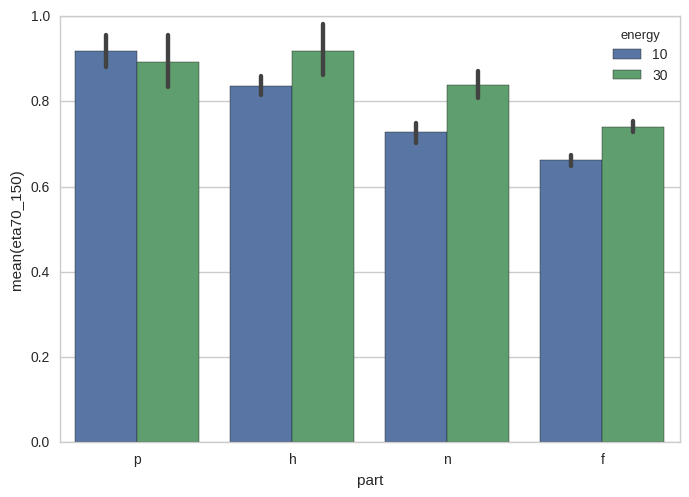

In [10]:
sns.barplot(x="part", y="eta70_150", hue="energy", data=tmp);

### PoinPlot
This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval.

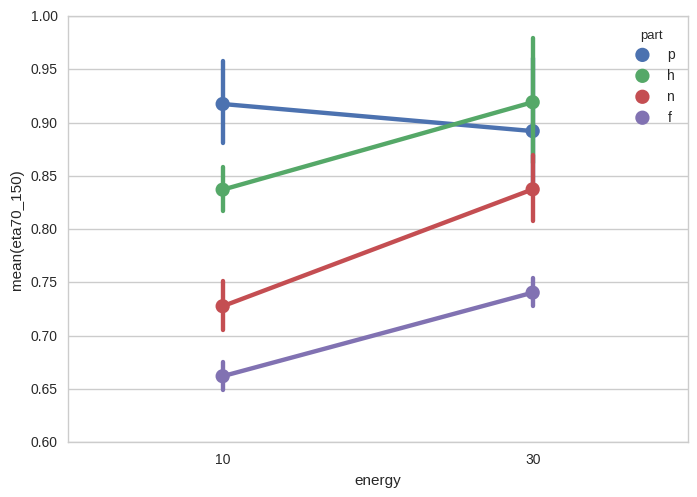

In [11]:
sns.pointplot(x="energy", y="eta70_150", hue="part", data=tmp);

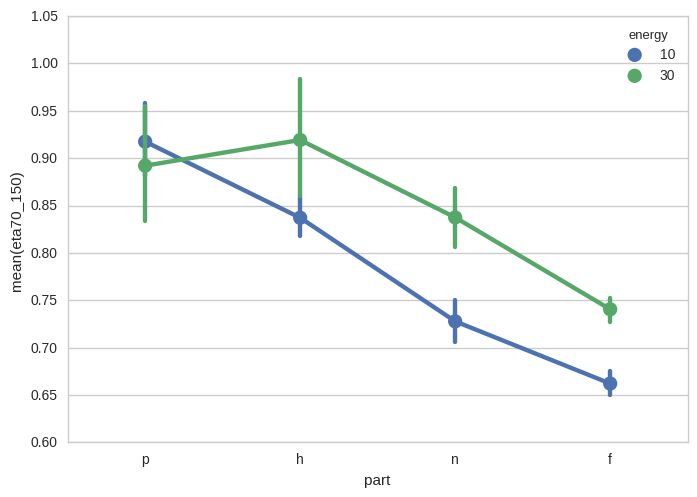

In [12]:
sns.pointplot(x="part", y="eta70_150", hue="energy", data=tmp);

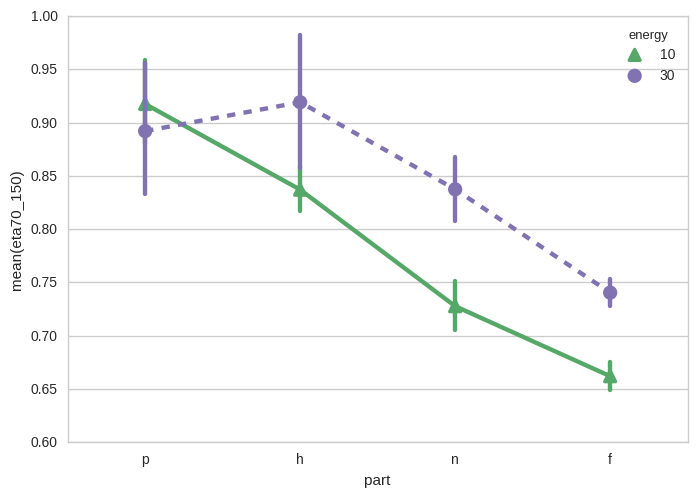

In [13]:
sns.pointplot(x="part", y="eta70_150", hue="energy", data=tmp,
              palette={10: "g", 30: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### Swarmplot
swarmplot positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

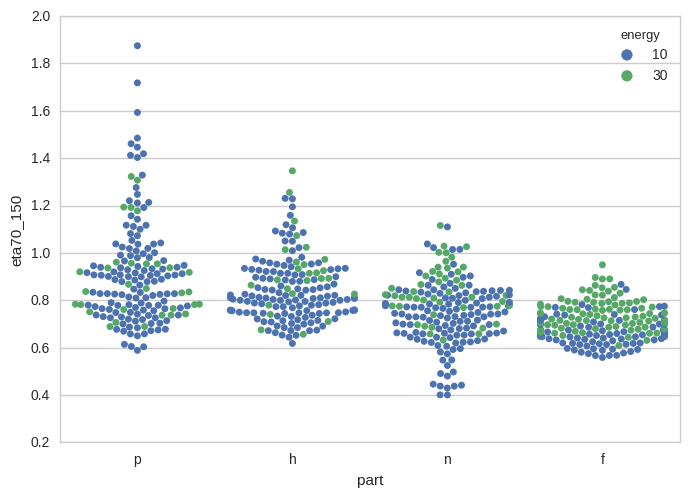

In [14]:
sns.swarmplot(x="part", y="eta70_150", hue="energy", data=tmp);